In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
path = "/content/gdrive/MyDrive/MachineLearning/praktikum/prak7/"

In [18]:
# membaca file csv menggunakan pandas
import pandas as pd
df = pd.read_csv(path + '/data/dataset_satelit.csv')
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [20]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


Mengambil hanya kolom numerik dan mengganti nilai kosong dengan rata-rata agar data siap dipakai untuk pemodelan.

In [21]:
df = df.select_dtypes(include=['float64', 'int64'])
df = df.fillna(df.mean(numeric_only=True))

Analisis kolerasi
Melihat hubungan antar variabel numerik dengan target N untuk mengetahui fitur yang paling berpengaruh.

In [22]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['N'].sort_values(ascending=False)

,N
N,1.000000
Lattitude,0.742794
P,0.643212
b9,0.535288
b8a,0.528105
b8,0.526838
Sigma_VH,0.503636
Sigma_VV,0.454871
Mn,0.383059
b5,0.376916


Persiapan Data (X dan y)

Memisahkan fitur (X) dan target (y) yang akan digunakan untuk melatih model.

In [23]:
X = df.drop(columns=['N'])
y = df['N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Normalisasi Data

Menstandarkan skala data agar setiap fitur memiliki pengaruh yang seimbang terhadap model.

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Pemodelan Regresi Linear

Melatih model regresi linear menggunakan data latih untuk memprediksi kadar Nitrogen (N).

In [25]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Evaluasi Model

Mengukur performa model menggunakan nilai R², MAE, dan RMSE untuk menilai seberapa baik model memprediksi data.

In [26]:
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


R² Score: 0.663
MAE: 0.164
RMSE: 0.226


Visualisasi Hasil Prediksi

Menampilkan perbandingan antara nilai aktual dan nilai prediksi untuk melihat kesesuaian model.

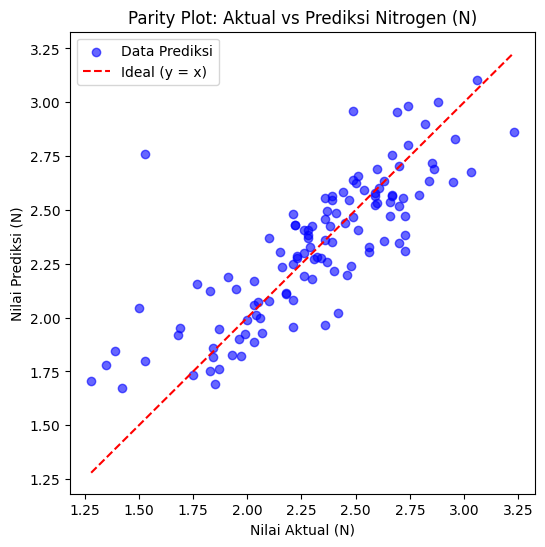

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Data Prediksi')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', label='Ideal (y = x)')
plt.xlabel("Nilai Aktual (N)")
plt.ylabel("Nilai Prediksi (N)")
plt.title("Parity Plot: Aktual vs Prediksi Nitrogen (N)")
plt.legend()
plt.show()


Tabel Hasil Prediksi

Menampilkan tabel perbandingan antara nilai aktual, prediksi, selisih error, dan akurasi tiap data uji.

In [28]:
hasil = pd.DataFrame({
    "Nilai Aktual (N)": y_test.to_numpy(),
    "Nilai Prediksi (N)": y_pred
})
hasil["Selisih Error (N)"] = hasil["Nilai Prediksi (N)"] - hasil["Nilai Aktual (N)"]
denom = hasil["Nilai Aktual (N)"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error (N)"].abs() / denom)).clip(lower=0, upper=1) * 100
hasil = hasil[hasil["Nilai Aktual (N)"] != 0]
hasil.head(10)


,Nilai Aktual (N),Nilai Prediksi (N),Selisih Error (N),Akurasi (%)
0,2.69,2.955388,0.265388,90.134281
1,2.28,2.372058,0.092058,95.962364
2,2.48,2.240246,-0.239754,90.332507
3,2.66,2.536728,-0.123272,95.365718
4,2.46,2.198053,-0.261947,89.351763
5,1.99,1.923571,-0.066429,96.661850
6,2.10,2.372061,0.272061,87.044729
7,2.66,2.470120,-0.189880,92.861639
8,2.49,2.466134,-0.023866,99.041546
9,2.31,2.274242,-0.035758,98.452026


Kesimpulan

Hasil pemodelan menunjukkan bahwa model regresi linear mampu memprediksi kadar Nitrogen (N) dengan baik.
Semakin tinggi nilai R² dan semakin kecil MAE serta RMSE, maka semakin baik pula performa model dalam memahami pola data satelit.